## Jovian Cousre Project
### [course link <-](https://jovian.ai/learn/deep-learning-with-pytorch-zero-to-gans)
#### Final Course Project was built individually using any dataset of learners choice.

<img src="pic/jovian_certificate.png" alt="jovian certificate" style="width: 400px;"/>

# Predicting Movie Genre from Posters using Deep Learning Models in Pytorch

[Link to custom DataSet](https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/Movie_Poster_Dataset.zip)  
[Link_to modified DataSet](https://drive.google.com/file/d/1iQV5kKF_KGZL9ALx9MMXk_Lg7PklBLCE/view?usp=sharing) 
used modified dataset for this project

In [ ]:
!pip install jovian

     |████████████████████████████████| 71kB 4.0MB/s 
  Created wheel for uuid: filename=uuid-1.30-cp36-none-any.whl size=6502 sha256=c488145ea847532ec25ae79bcd8c71f244f0b5b3488032a4fc1dfed8e300826d
  Stored in directory: /root/.cache/pip/wheels/2a/80/9b/015026567c29fdffe31d91edbe7ba1b17728db79194fca1f21
Successfully built uuid


In [ ]:
project_name='jovian-zero2GAN-courseProject'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import jovian

In [ ]:
import os
#import zipfile
import pandas as pd
import numpy as np

from PIL import Image
import torch
import torchvision
import random
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
#from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision import transforms
from torchvision.transforms import ToTensor

  #Extract from archive ...but didn't because already downoaded the dataset

with zipfile.ZipFile('data/Multi_Label_dataset.zip', 'r') as zip_ref:  
    zip_ref.extractall(path='./data/Multi_Label_dataset')

In [ ]:
!pwd

/content


/content/gdrive/MyDrive/data/Multi_Label_dataset/Multi_Label_dataset

In [ ]:
wd = '/content/gdrive/MyDrive/data/Multi_Label_dataset/Multi_Label_dataset/'
images_dir = '/content/gdrive/MyDrive/data/Multi_Label_dataset/Multi_Label_dataset/Images'

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/data/Multi_Label_dataset/Multi_Label_dataset/train.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


##### This DataFrame is a kind of a CROSS TABLE

# EDA

In [ ]:
train.columns #list of labels... column name id and genre to be removed 

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [ ]:
len(train) #no of images in dataset

7254

In [ ]:
train = train.set_index('Id')
train.head(3)

,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
Id,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = train.drop(['Genre'], axis= 1) 
train.head(3) 

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
Id,,,,,,,,,,,,,,,,,,,,,,,,,
tt0086425,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0085549,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
tt0086465,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
(train.T).nunique()  #Table has two unique values 0 and 1  ... 1 being movie poster belongs to that genre

Id
tt0086425    2
tt0085549    2
tt0086465    2
tt0086567    2
tt0086034    2
            ..
tt2409818    2
tt2062622    2
tt2442502    2
tt3455850    2
tt4179482    2
Length: 7254, dtype: int64

In [ ]:
sum((train.T).nunique()) #

14508

In [ ]:
train.nunique() #list of genres with genres with unique values 0 or 1

Action         2
Adventure      2
Animation      2
Biography      2
Comedy         2
Crime          2
Documentary    2
Drama          2
Family         2
Fantasy        2
History        2
Horror         2
Music          2
Musical        2
Mystery        2
N/A            2
News           2
Reality-TV     2
Romance        2
Sci-Fi         2
Short          2
Sport          2
Thriller       2
War            2
Western        2
dtype: int64

In [ ]:
sum((train).nunique())

50

In [ ]:
(train.describe()).T

,count,mean,std,min,25%,50%,75%,max
Action,7254.0,0.185139,0.388437,0.0,0.0,0.0,0.0,1.0
Adventure,7254.0,0.119934,0.324907,0.0,0.0,0.0,0.0,1.0
Animation,7254.0,0.033637,0.180304,0.0,0.0,0.0,0.0,1.0
Biography,7254.0,0.060794,0.238969,0.0,0.0,0.0,0.0,1.0
Comedy,7254.0,0.399779,0.489887,0.0,0.0,0.0,1.0,1.0
Crime,7254.0,0.162117,0.368584,0.0,0.0,0.0,0.0,1.0
Documentary,7254.0,0.089881,0.286032,0.0,0.0,0.0,0.0,1.0
Drama,7254.0,0.498897,0.500033,0.0,0.0,0.0,1.0,1.0
Family,7254.0,0.059829,0.237186,0.0,0.0,0.0,0.0,1.0
Fantasy,7254.0,0.064378,0.245442,0.0,0.0,0.0,0.0,1.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7254 entries, tt0086425 to tt4179482
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Action       7254 non-null   int64
 1   Adventure    7254 non-null   int64
 2   Animation    7254 non-null   int64
 3   Biography    7254 non-null   int64
 4   Comedy       7254 non-null   int64
 5   Crime        7254 non-null   int64
 6   Documentary  7254 non-null   int64
 7   Drama        7254 non-null   int64
 8   Family       7254 non-null   int64
 9   Fantasy      7254 non-null   int64
 10  History      7254 non-null   int64
 11  Horror       7254 non-null   int64
 12  Music        7254 non-null   int64
 13  Musical      7254 non-null   int64
 14  Mystery      7254 non-null   int64
 15  N/A          7254 non-null   int64
 16  News         7254 non-null   int64
 17  Reality-TV   7254 non-null   int64
 18  Romance      7254 non-null   int64
 19  Sci-Fi       7254 non-null   int64
 20  

In [ ]:
import seaborn as sns

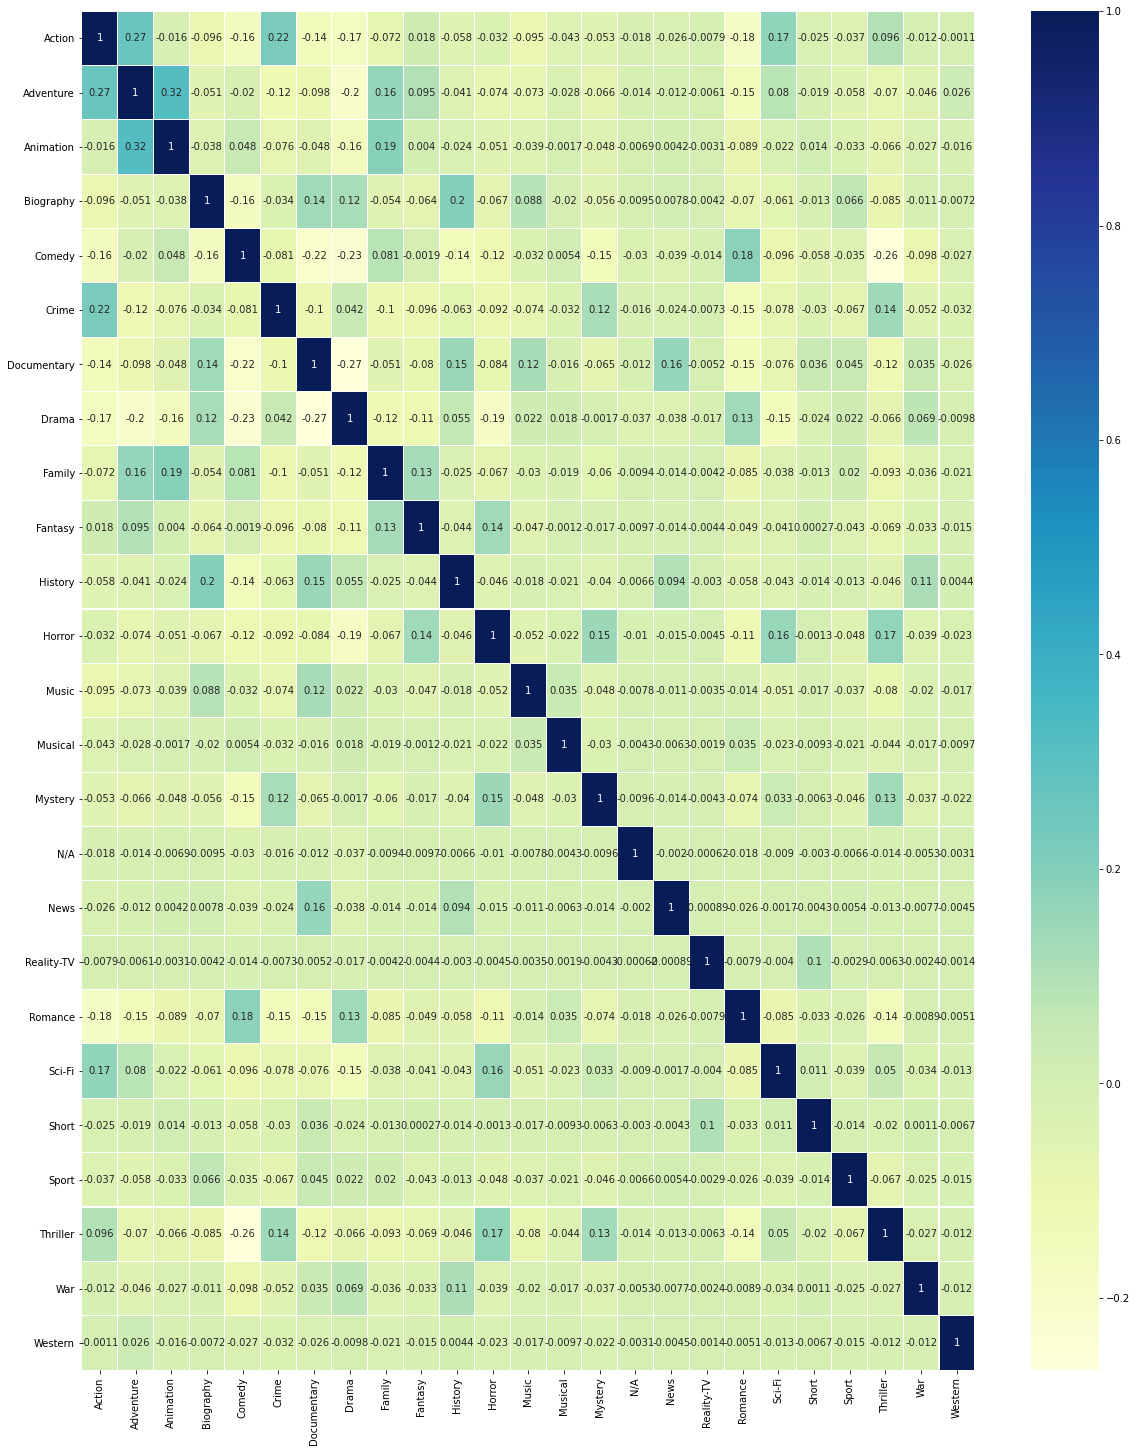

In [ ]:
f, ax = plt.subplots(figsize =(20, 25)) 
sns.heatmap(train.corr(), annot=True, cmap ="YlGnBu", linewidths = 0.1) 

# Customizing dataset

list of resources to customize dataset   
(https://towardsdatascience.com/building-efficient-custom-datasets-in-pytorch-2563b946fd9f)
(https://github.com/utkuozbulak/pytorch-custom-dataset-examples/blob/master/README.md)
(https://debuggercafe.com/custom-dataset-and-dataloader-in-pytorch/)
(https://www.youtube.com/watch?v=ZoZHd0Zm3RY&t=393s&ab_channel=AladdinPersson)
(https://naadispeaks.wordpress.com/2019/10/08/pytorch-custom-dataset-tips-and-tricks/)
(https://pytorch.org/tutorials/beginner/data_loading_tutorial.html?highlight=torchvision)

In [ ]:
class myDataset(Dataset):
    def __init__(self,csv_file, root_dir, transform= None ):
        
        dataframe = pd.read_csv(csv_file)
        cls = list(dataframe)
        cls = cls[2:]
        
        self.annotations = dataframe
        self.classes = cls
        self.root_dir = root_dir
        self.transform = transform
        self.resize = torchvision.transforms.Resize((400,400))
        self.shape = self.__getshape__()

    def __len__(self):
        return len(self.annotations)
    
    def __getshape__(self):
        return (self.__len__(),self.__getitem__(0)[0].size())

    
    def __classes__(self):
        return (self.classes)
    
    
    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index,0])
        image = Image.open(img_path+'.jpg').convert("RGB")
        image = self.resize(image) 
        image = np.array(image)
        
        label = self.annotations.iloc[index,1]
        label = list(label)
        encoded_label = self.annotations.iloc[index,2:]
        
        
        if self.transform:
            image = self.transform(image)
            
        
        return (image,torch.tensor(encoded_label, dtype=torch.float32))

In [ ]:
dataset = myDataset(csv_file = wd+'/train.csv', root_dir = images_dir,transform = ToTensor())#transform=False)
                   

In [ ]:
dataset # datset is an object

In [ ]:
dataset.shape

(7254, torch.Size([3, 400, 400]))

In [ ]:
dataset.classes

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'N/A',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [ ]:
img, label = dataset[2] #label of image is 
print(label)

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.])


In [ ]:
img, label = dataset[2]
x= pd.Series(label.int(),dataset.classes)
x

Action         0
Adventure      0
Animation      0
Biography      0
Comedy         1
Crime          0
Documentary    0
Drama          0
Family         0
Fantasy        0
History        0
Horror         0
Music          0
Musical        0
Mystery        0
N/A            0
News           0
Reality-TV     0
Romance        0
Sci-Fi         0
Short          0
Sport          0
Thriller       0
War            0
Western        0
dtype: int32

In [ ]:
len(dataset)

7254

In [ ]:
img.shape

torch.Size([3, 400, 400])

In [ ]:
label.dtype

torch.float32

In [ ]:
label.type

<function Tensor.type>

In [ ]:
def show_example(img, label):
    print('Label: /n', pd.Series(label.int(),dataset.classes))
    plt.imshow(img.permute(1, 2, 0))

In [ ]:
dataset.annotations #annotation attribute of dataset contain whole dataframe

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,tt2409818,"['Action', 'Crime', 'Thriller']",1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7250,tt2062622,"['Animation', 'Comedy', 'Family']",0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7251,tt2442502,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7252,tt3455850,['Documentary'],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Label: /n Action         0
Adventure      0
Animation      0
Biography      0
Comedy         0
Crime          0
Documentary    0
Drama          1
Family         0
Fantasy        0
History        1
Horror         0
Music          0
Musical        0
Mystery        0
N/A            0
News           0
Reality-TV     0
Romance        1
Sci-Fi         0
Short          0
Sport          0
Thriller       0
War            0
Western        0
dtype: int32


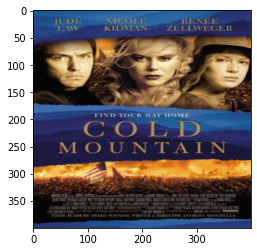

In [ ]:
show_example(*dataset[ random.randint(0, len(dataset))]) #uses *args to pass selected image

Label: /n Action         0
Adventure      0
Animation      0
Biography      0
Comedy         0
Crime          1
Documentary    0
Drama          1
Family         0
Fantasy        0
History        0
Horror         0
Music          0
Musical        0
Mystery        0
N/A            0
News           0
Reality-TV     0
Romance        1
Sci-Fi         0
Short          0
Sport          0
Thriller       0
War            0
Western        0
dtype: int32


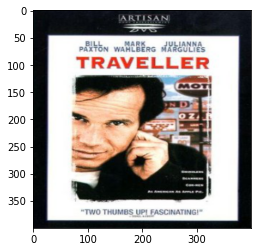

In [ ]:
show_example(*dataset[ random.randint(0, len(dataset))]) #uses *args to pass selected image

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: Please provide the project argument e.g. jovian.commit(project='my-project')


# Spliting Dataset

In [ ]:
random_seed = 42
batch_size = 30
torch.manual_seed(random_seed);
#manually seeding random so that same validation set is genrated each time.

In [ ]:
test_size = int(len(dataset)*0.15)
test_size

1088

In [ ]:
remain_size = len(dataset) - test_size

remain_ds, test_ds = random_split(dataset, [remain_size, test_size])
len(remain_ds), len(test_ds)

(6166, 1088)

In [ ]:
val_size = int(len(remain_ds)*0.18)
val_size

1109

In [ ]:
train_size = len(remain_ds) - val_size
train_size

5057

In [ ]:
train_ds, val_ds = random_split(remain_ds, [train_size, val_size])
len(train_ds), len(val_ds)

(5057, 1109)

# DataLoader

In [ ]:
from torch.utils.data.dataloader import DataLoader

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size*2, num_workers=4, pin_memory=True)

# Helper function for Training and validation  
   [loss = binary_crossentropy](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html?highlight=bceloss#torch.nn.BCELoss)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary                             #gives summary of the model
from sklearn.metrics import hamming_loss, precision_score, f1_score #evaluation metrics

In [ ]:
class PredictGenreBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        criterion = nn.BCELoss()
        loss = criterion(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        criterion = nn.BCELoss()
        loss = criterion(out, labels)
        acc = accuracy(out, labels)
        F1_score = F1(out, labels)
        #ham = hammingloss(out, labels)
        return {'val_loss': loss.detach() ,  'F1_score': F1_score,'val_acc': acc}#, 'hammingloss': ham }
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies

        batch_F1_score = [x['F1_score'] for x in outputs]
        epoch_F1_score = torch.stack(batch_F1_score).mean() 
        #batch_ham = [x['hammingloss'] for x in outputs]
        #epoch_ham = torch.stack(batch_ham).mean() 
        return {'val_loss': epoch_loss.item() ,'F1_score': epoch_F1_score.item(), 'val_acc': epoch_acc.item()}#,, 'hammingloss': epoch_ham.item() }
    
    def epoch_end(self, epoch, result):
        #print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}".format(
         #     epoch, result['train_loss'], result['val_loss']))
         print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, F1_score: {:.4f} val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['F1_score'], result['val_acc']))
        
def F1(outputs, labels): #better F1 score implies balanced precision and recall tradeoff
    op = outputs.cpu()
    la = labels.cpu()
    preds = (op> 0.5).float()  #f1 uses presion and recall to counter false positive and false negative faced in accuracy 
    return torch.tensor(f1_score(la, preds ,average = 'samples'))

def accuracy(outputs, labels):
    op = outputs.cpu()
    la = labels.cpu()
    preds = (op > 0.5).float() #converts output probabilities to either zero or one thus making accuracy inaccurate. i.e false positives and false negative issue.
    return torch.tensor(torch.sum(preds == la).item() / (len(la)*25)) # *25 beacuse 25 classes and la length is batch size i.e 25*30 =750 tensors
                                                                      #preds == la matches each tensors 

#def precision(outputs, labels):
#    op = outputs.cpu()
#    la = labels.cpu()
#    preds = (op.cpu()> 0.5).float()
#    return torch.tensor(precision_score(la,preds, average = 'weighted', zero_division=0))

def hammingloss(outputs, labels):
    op = outputs.cpu()
    la = labels.cpu()
    preds = (op> 0.5).float()
    return torch.tensor(hamming_loss(la, preds))

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

# MODEL 

In [ ]:
class movieGenreModel(PredictGenreBase):
    def __init__(self):
        super().__init__()
            #input channels = 3
        self.network1 = nn.Sequential(        # input: 3 x 400 x 400
            
            nn.Conv2d(3, 16, kernel_size=5), # output: 16 x 396 x 396
            nn.ReLU(),                       # output: 16 x 396 x 396
            nn.MaxPool2d(2, 2),              # output  16 x '396/2='198 x '396/2='198
            nn.Dropout(0.25),                # Output is of the same shape as input 
        )
        self.network2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5), 
            nn.ReLU(),                       
            nn.MaxPool2d(2, 2),              
            nn.Dropout(0.25),
        )
        self.network3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),               
            nn.Dropout(0.25),
        )
        self.network4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                
            nn.Dropout(0.25),
        )
        self.linear1 = nn.Linear(64*21*21,128)
        #self.ReLU1 = nn.ReLU()
        self.linear2 = nn.Linear(128,64)
        #self.ReLU2 = nn.ReLU()
        self.linear3 =nn.Linear(64,25)
        #self.ReLU3 = nn.ReLU()

    def forward(self, xb):
      xb = self.network1(xb)
      xb = self.network2(xb)
      xb = self.network3(xb)
      xb = self.network4(xb)
      xb = xb.view(xb.size(0), -1)
      xb = self.linear1(xb)
      #xb = self.ReLU1(xb)
      xb = self.linear2(xb)
      #xb = self.ReLU2(xb),
      xb = self.linear3(xb)
      #xb = self.ReLU3(xb),
      
      return torch.sigmoid(xb)  #sigmoid gives indipendent pobabilities for each label thus a poster can belong to multiple labels(genre)
                                #while soft-max would have adjusted all probabilities to give max probability of only one labels (genre) 

# Final output layer 
#### sigmoid gives indipendent pobabilities for each label thus a poster can belong to multiple labels(genre)
#### while soft-max would have adjusted all probabilities to give max probability of only one labels (genre) 

In [ ]:
model = movieGenreModel()
model

movieGenreModel(
  (network1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.25, inplace=False)
  )
  (network2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.25, inplace=False)
  )
  (network3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.25, inplace=False)
  )
  (network4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.25, inplace=False)
  )
  (linear1): Linear(in_features=28224, out_features=128, bias=True)


# Loading Model to available GPU/CPU

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
model = to_device(movieGenreModel(), device)

### summary only workes after model is loaded in Device

In [ ]:
summary(model, (img.shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 396, 396]           1,216
              ReLU-2         [-1, 16, 396, 396]               0
         MaxPool2d-3         [-1, 16, 198, 198]               0
           Dropout-4         [-1, 16, 198, 198]               0
            Conv2d-5         [-1, 32, 194, 194]          12,832
              ReLU-6         [-1, 32, 194, 194]               0
         MaxPool2d-7           [-1, 32, 97, 97]               0
           Dropout-8           [-1, 32, 97, 97]               0
            Conv2d-9           [-1, 64, 93, 93]          51,264
             ReLU-10           [-1, 64, 93, 93]               0
        MaxPool2d-11           [-1, 64, 46, 46]               0
          Dropout-12           [-1, 64, 46, 46]               0
           Conv2d-13           [-1, 64, 42, 42]         102,464
             ReLU-14           [-1, 64,

# Loading data  to device

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [ ]:
for images, labels in train_dl:
    print("images shape: ", images.shape)
    out = model(images)
    print('Label:', labels[0])
    print("out shape: ", out.shape)
    print("out[0]: ",  (out[0].cpu()))
    print("out len: ",  len(labels.cpu())*25)
    break

images shape:  torch.Size([30, 3, 400, 400])
Label: tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 0.], device='cuda:0')
out shape:  torch.Size([30, 25])
out[0]:  tensor([0.4815, 0.5122, 0.5171, 0.4773, 0.5436, 0.5168, 0.4955, 0.5049, 0.5142,
        0.5014, 0.5043, 0.5123, 0.4693, 0.4715, 0.5382, 0.5146, 0.5302, 0.5196,
        0.4841, 0.5137, 0.4955, 0.4714, 0.5301, 0.5206, 0.4871],
       grad_fn=<CopyBackwards>)
out len:  750


##### input image shape is 4 dimension 30 is the batch size
##### labels are 25 classes
##### output shape is 2 dimension tensor representing 30 batches of probabilities for each class
##### out[0] is one of the batch with inpendent label probabilities i,e other class didnot effect the calculaltion of probabilities because a poster can have multiple genre

# driver

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        train_losses =[]
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)

    return history

# Training

In [ ]:
history1 = fit(10, 0.001, model, train_dl, val_dl) #epochs, lr, model, train_loader, val_loader

Epoch [0], train_loss: 0.2391, val_loss: 0.2356, F1_score: 0.3234 val_acc: 0.9109
Epoch [1], train_loss: 0.2365, val_loss: 0.2366, F1_score: 0.3762 val_acc: 0.9106
Epoch [2], train_loss: 0.2354, val_loss: 0.2332, F1_score: 0.2565 val_acc: 0.9132
Epoch [3], train_loss: 0.2356, val_loss: 0.2340, F1_score: 0.2988 val_acc: 0.9118
Epoch [4], train_loss: 0.2330, val_loss: 0.2349, F1_score: 0.3722 val_acc: 0.9125
Epoch [5], train_loss: 0.2299, val_loss: 0.2363, F1_score: 0.2847 val_acc: 0.9131
Epoch [6], train_loss: 0.2267, val_loss: 0.2371, F1_score: 0.1927 val_acc: 0.9124
Epoch [7], train_loss: 0.2204, val_loss: 0.2385, F1_score: 0.2876 val_acc: 0.9116
Epoch [8], train_loss: 0.2087, val_loss: 0.2463, F1_score: 0.3672 val_acc: 0.9117
Epoch [9], train_loss: 0.1940, val_loss: 0.2564, F1_score: 0.3448 val_acc: 0.9087


In [ ]:
wait

In [ ]:
history2  = fit(25, 0.0001, model, train_dl,val_dl)

Epoch [0], train_loss: 0.1561, val_loss: 0.3002, F1_score: 0.3045 val_acc: 0.9004
Epoch [1], train_loss: 0.1472, val_loss: 0.3085, F1_score: 0.3317 val_acc: 0.8974
Epoch [2], train_loss: 0.1419, val_loss: 0.3199, F1_score: 0.3108 val_acc: 0.8982
Epoch [3], train_loss: 0.1372, val_loss: 0.3269, F1_score: 0.3245 val_acc: 0.8970
Epoch [4], train_loss: 0.1324, val_loss: 0.3377, F1_score: 0.3079 val_acc: 0.8958
Epoch [5], train_loss: 0.1273, val_loss: 0.3578, F1_score: 0.3231 val_acc: 0.8966
Epoch [6], train_loss: 0.1213, val_loss: 0.3633, F1_score: 0.3138 val_acc: 0.8928
Epoch [7], train_loss: 0.1146, val_loss: 0.3819, F1_score: 0.3136 val_acc: 0.8908
Epoch [8], train_loss: 0.1070, val_loss: 0.4030, F1_score: 0.3147 val_acc: 0.8907
Epoch [9], train_loss: 0.0990, val_loss: 0.4253, F1_score: 0.3158 val_acc: 0.8875
Epoch [10], train_loss: 0.0900, val_loss: 0.4585, F1_score: 0.3149 val_acc: 0.8884
Epoch [11], train_loss: 0.0803, val_loss: 0.4946, F1_score: 0.3111 val_acc: 0.8860
Epoch [12], tr

In [ ]:
history3  = fit(50, 0.00001, model, train_dl,val_dl)

Epoch [0], train_loss: 0.0012, val_loss: 1.8881, F1_score: 0.3043 val_acc: 0.8814
Epoch [1], train_loss: 0.0010, val_loss: 1.9527, F1_score: 0.3070 val_acc: 0.8809
Epoch [2], train_loss: 0.0009, val_loss: 2.0119, F1_score: 0.3074 val_acc: 0.8810
Epoch [3], train_loss: 0.0008, val_loss: 2.0574, F1_score: 0.3062 val_acc: 0.8810
Epoch [4], train_loss: 0.0007, val_loss: 2.0859, F1_score: 0.3039 val_acc: 0.8810
Epoch [5], train_loss: 0.0006, val_loss: 2.1368, F1_score: 0.3069 val_acc: 0.8815
Epoch [6], train_loss: 0.0006, val_loss: 2.1799, F1_score: 0.3046 val_acc: 0.8810
Epoch [7], train_loss: 0.0005, val_loss: 2.2233, F1_score: 0.3054 val_acc: 0.8815
Epoch [8], train_loss: 0.0005, val_loss: 2.2706, F1_score: 0.3061 val_acc: 0.8813
Epoch [9], train_loss: 0.0004, val_loss: 2.3050, F1_score: 0.3055 val_acc: 0.8811
Epoch [10], train_loss: 0.0004, val_loss: 2.3409, F1_score: 0.3065 val_acc: 0.8812
Epoch [11], train_loss: 0.0004, val_loss: 2.3865, F1_score: 0.3058 val_acc: 0.8810
Epoch [12], tr

KeyboardInterrupt: ignored

### Stopping as train loss became ZERO!

### final scores: Epoch [37], train_loss: 0.0000, val_loss: 3.3372, F1_score: 0.3073 val_acc: 0.8812

there might be need of regularization and other optimization technique in Neural-Net for getting better F1 score ... Accuracy is good but chances of False positive and False Negatives makes accuracy not so accurate.

In [ ]:
history4  = fit(75, 0.00001, model, train_dl,val_dl)

In [ ]:
history5  = fit(100, 0.000001, model, train_dl,val_dl)

#for multi label classification and mulit class classification F1_score or hamilton loss are better metric than accuracy.

# final scores:  

# PLOTS

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

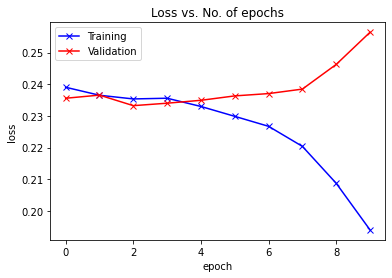

In [ ]:
plot_losses(history1)

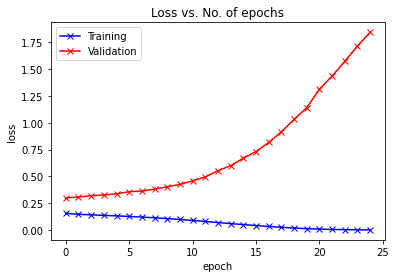

In [ ]:
plot_losses(history2)

In [ ]:
plot_losses(history3) # takes a lot time to train

NameError: ignored

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

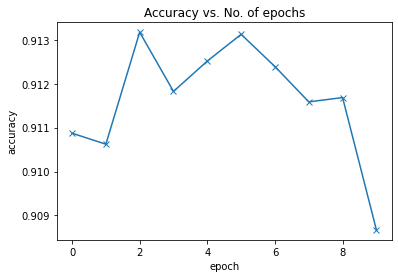

In [ ]:
plot_accuracies(history1)

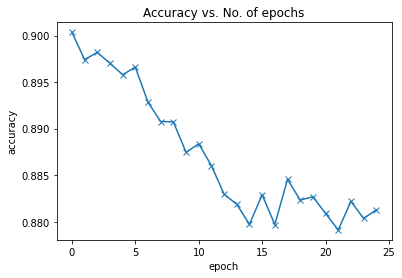

In [ ]:
plot_accuracies(history2)

In [ ]:
def plot_F1_score(history):
  F1 = [x['F1_score'] for x in history]
  plt.plot(F1, '-x')
  plt.xlabel('epoch')
  plt.ylabel('F1_score')
  plt.title('F1_score vs. No. of epochs');

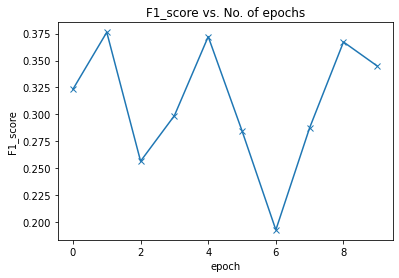

In [ ]:
plot_F1_score(history1)

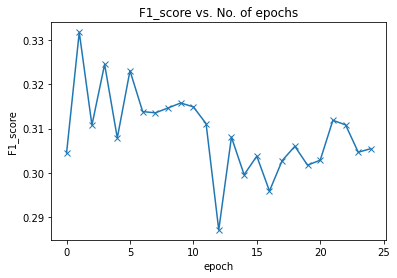

In [ ]:
plot_F1_score(history2)

# Sample Prediticon from test set

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    preds = (yb > 0.5).float()
    # Retrieve the class label
    return preds

# tensors don't make sense!

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']
Label: tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.])
Predicted: tensor([[0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0.]], device='cuda:0')


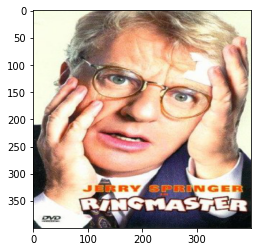

In [ ]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print(dataset.classes)
print('Label:', label,)
preds = predict_image(img, model)
print('Predicted:', preds)


,Comedy,Drama,Romance
Label,1,0,0
Prediction,1,1,1


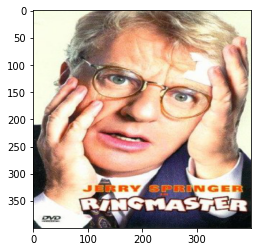

In [ ]:
display_result(*test_ds[0], model) #function is defined below ... cell is put here to make sense of tensors.

### Looking at the poster predections does make sense..😅

### Method to make Results understandable

In [ ]:
def display_result(img, label, model):
  plt.imshow(img.permute(1, 2, 0))
  #print('Label:', label)
  preds = predict_image(img, model)

  l = ((label.numpy()).astype(int)).tolist()
  p = (preds.cpu().numpy().astype(int)).tolist()
  P= pd.DataFrame(p)
  L = pd.DataFrame(l).T
  result = pd.concat([L,P], axis= 0)
  result.index = ['Label','Prediction']
  result.columns = dataset.classes
  result = result.T
  filt = (result['Label'] == 1)
  filt1 = (result['Prediction'] == 1) 
  result = result[filt | filt1 ]
  display(result.T)

,Comedy,Drama,Romance
Label,1,1,1
Prediction,1,0,1


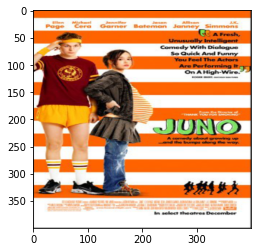

In [ ]:
display_result(*test_ds[ random.randint(0, len(test_ds))], model)

,Animation,Drama
Label,1,1
Prediction,0,0


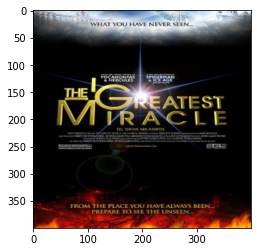

In [ ]:
display_result(*test_ds[ random.randint(0, len(test_ds))], model)

,Action,Adventure,Drama,Sport
Label,1,0,1,1
Prediction,0,1,0,0


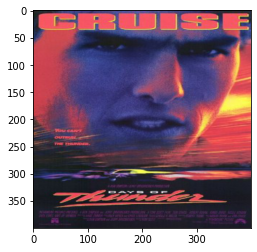

In [ ]:
display_result(*test_ds[ random.randint(0, len(test_ds))], model)

,Action,Adventure,Comedy,Drama,Family,Fantasy,Romance
Label,0,0,1,0,1,1,0
Prediction,1,1,0,1,0,0,1


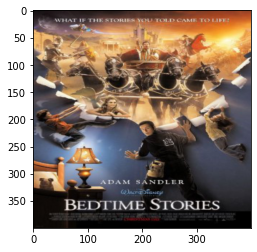

In [ ]:
display_result(*test_ds[ random.randint(0, len(test_ds))], model)

,Adventure,Drama,Romance
Label,1,1,1
Prediction,0,1,1


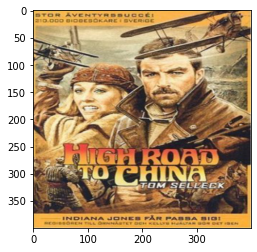

In [ ]:
display_result(*test_ds[ random.randint(0, len(test_ds))], model)

# conclusion   
Project was quite grueling as it required knowledge of many verticals such as image processing, dataset customization, ecoding techniques, pandas, pytorch, deep Learning, model building and testing. Finishing this project helped my confidence grow more towards my aspiration to solve real world problems and gain Wisdom through Data.